In [17]:
import pandas as pd
train_path = "../input/multilingual-fake-news/TALLIP-FakeNews-Dataset/English/Train/train_English_Data"
test_path = "../input/multilingual-fake-news/TALLIP-FakeNews-Dataset/English/Test/test_English_Data"

In [18]:
def get_df(path):
    bus = pd.read_table(path+'_Business.txt',header=0,names=('Domain','Topic','News','Label'))
    cel = pd.read_table(path+'_Celebrity_Full.txt',header=0,names=('Domain','Topic','News','Label'))
    com = pd.read_table(path+'_Complete_FakeNews.txt',header=0,names=('Domain','Topic','News','Label'))
    edu = pd.read_table(path+'_Education.txt',header=0,names=('Domain','Topic','News','Label'))
    ent = pd.read_table(path+'_Entertainment.txt',header=0,names=('Domain','Topic','News','Label'))
    pol = pd.read_table(path+'_Politics.txt',header=0,names=('Domain','Topic','News','Label'))
    spo = pd.read_table(path+'_Sports.txt',header=0,names=('Domain','Topic','News','Label'))
    tec = pd.read_table(path+'_Technology.txt',header=0,names=('Domain','Topic','News','Label'))
    data = pd.concat([bus,cel,com,edu,ent,pol,spo,tec],ignore_index=True)
    return data

In [19]:
train_data = get_df(train_path)
test_data = get_df(test_path)

In [20]:
print(train_data.isna().sum()) #23 titles null
print(test_data.isna().sum()) # no null

Domain     0
Topic     22
News       1
Label      0
dtype: int64
Domain     0
Topic     14
News       1
Label      0
dtype: int64


In [21]:
def convert_data(df):
    df['Topic_News'] = df['Topic'].astype(str)+"."+df['News'].astype(str)
    df['Label'] = df['Label'].str.upper()
    return df
train_data,test_data = convert_data(train_data),convert_data(test_data)

In [22]:
print(train_data.isna().sum()) #23 titles null
print(test_data.isna().sum()) # no null

Domain         0
Topic         22
News           1
Label          0
Topic_News     0
dtype: int64
Domain         0
Topic         14
News           1
Label          0
Topic_News     0
dtype: int64


In [ ]:
Fake = train_data[train_data.Label=='FAKE']['Topic_News']
Legit = train_data[train_data.Label=='LEGIT']['Topic_News']

In [ ]:
import matplotlib.pyplot as plt
color = ['Blues_r', 'Reds_r',]
splitted_data = [Fake, Legit]
for item in range(len(splitted_data)):
    plt.figure(figsize=(10,5))
    pd.Series(' '.join([i for i in splitted_data[item]]).split()).value_counts().head(20).plot(kind='bar',colormap=color[item])

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['labels']=encoder.fit_transform(train_data['Label'])
test_data['labels']=encoder.fit_transform(test_data['Label'])
print(train_data['labels'].value_counts())
print(test_data['labels'].value_counts())

1    609
0    579
Name: labels, dtype: int64
0    401
1    371
Name: labels, dtype: int64


In [24]:
#!pip install - q transformers
from transformers import AutoTokenizer,AutoModel,AutoModelForSequenceClassification
MODEL_TYPE = 'xlmroberta'#'bert'
MODEL_NAME = 'xlm-roberta-base' #'bert-base-uncased'
#tokenizer =  AutoTokenizer.from_pretrained(MODEL_NAME) 

In [10]:
MODEL_TYPE = 'bert'
MODEL_NAME = 'google/muril-base-cased' #'bert-base-uncased'

In [ ]:
MODEL_TYPE = 'albert'
MODEL_NAME = 'ai4bharat/indic-bert'

In [25]:
MODEL_TYPE = 'bert'
MODEL_NAME = 'bert-base-uncased'

In [ ]:
token_counts = []
for _, row in train_data.iterrows():
    token_count = len(tokenizer.encode(
    row["Topic_News"], 
    max_length=1024, 
    truncation=True
  ))
    token_counts.append(token_count)
import seaborn as sns
sns.histplot(token_counts)
plt.xlim([0, 750]);

In [ ]:
token_counts = []
for _, row in test_data.iterrows():
    token_count = len(tokenizer.encode(
    row["Topic_News"], 
    max_length=1024, 
    truncation=True
  ))
    token_counts.append(token_count)
import seaborn as sns
sns.histplot(token_counts)
plt.xlim([0, 750]);

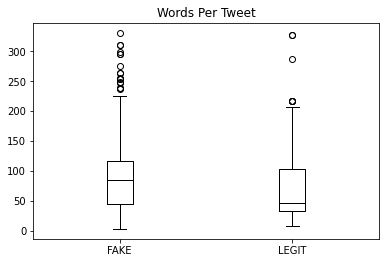

In [11]:
import matplotlib.pyplot as plt
train_data["Words Per Tweet"] = train_data["Topic_News"].str.split().apply(len)
train_data.boxplot("Words Per Tweet", by="Label", grid=False, showfliers=True,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [26]:
!pip install -q simpletransformers
import torch
from simpletransformers.classification import ClassificationModel,ClassificationArgs
model_args = ClassificationArgs(
    num_train_epochs=5,
    overwrite_output_dir=True, 
    manual_seed=42,
    max_seq_length=512,
    #sliding_window=True,
    eval_batch_size=16,
    do_lower_case=True,
   #stride=0.9,
    early_stopping_patience=2,
    save_model_every_epoch=False,
    early_stopping_consider_epochs=True,
    use_early_stopping=True,
    evaluate_during_training=True,
    #wandb_project='ST-Hope-CELoss',
    learning_rate=3e-05)
model = ClassificationModel(
    model_type=MODEL_TYPE,#'deberta',
    model_name=MODEL_NAME, 
    use_cuda=torch.cuda.is_available(),
    #cuda_device=3,
    num_labels=len(encoder.classes_), 
    args=model_args)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [27]:
train_df=pd.DataFrame()
train_df['text']=train_data['Topic_News']
train_df['labels']=train_data['labels']

In [28]:
test_df=pd.DataFrame()
test_df['text']=test_data['Topic_News']
test_df['labels']=test_data['labels']

In [29]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_df,test_size=0.2,random_state=42,stratify=train_df['labels'])
print(train_df.labels.value_counts())
print(valid_df.labels.value_counts())

1    487
0    463
Name: labels, dtype: int64
1    122
0    116
Name: labels, dtype: int64


In [30]:
model.train_model(train_df,eval_df=valid_df,args={'train_batch_size':16})

  0%|          | 0/950 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/238 [00:00<?, ?it/s]

(300,
 defaultdict(list,
             {'global_step': [60, 120, 180, 240, 300],
              'train_loss': [0.5755208134651184,
               0.2723795473575592,
               0.0686187744140625,
               0.02085367776453495,
               0.06322606652975082],
              'mcc': [0.49832228501764736,
               0.6463136861440634,
               0.7651879367357822,
               0.784842347151872,
               0.7730668021746385],
              'tp': [100, 92, 106, 115, 110],
              'tn': [78, 103, 104, 97, 101],
              'fp': [38, 13, 12, 19, 15],
              'fn': [22, 30, 16, 7, 12],
              'auroc': [0.8229225551158847,
               0.9182447710570943,
               0.9430469191633691,
               0.953116167326173,
               0.9597936687394008],
              'auprc': [0.8298643460461367,
               0.9250157372398231,
               0.9498373854355601,
               0.9525446319939034,
               0.9626870440203278],
  

In [31]:
valid_predictions, raw_outputs = model.predict(valid_df['text'].tolist())
from sklearn.metrics import confusion_matrix, classification_report,f1_score
print('class_report\n',classification_report(valid_df['labels'],valid_predictions,target_names=list(encoder.classes_),digits=4))

  0%|          | 0/238 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

class_report
               precision    recall  f1-score   support

        FAKE     0.8938    0.8707    0.8821       116
       LEGIT     0.8800    0.9016    0.8907       122

    accuracy                         0.8866       238
   macro avg     0.8869    0.8862    0.8864       238
weighted avg     0.8867    0.8866    0.8865       238



In [32]:
test_predictions, raw_outputs = model.predict(test_df['text'].tolist())

  0%|          | 0/772 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report,f1_score
print('class_report\n',classification_report(test_df['labels'],test_predictions,target_names=list(encoder.classes_),digits=4))

class_report
               precision    recall  f1-score   support

        FAKE     0.9481    0.8653    0.9048       401
       LEGIT     0.8670    0.9488    0.9060       371

    accuracy                         0.9054       772
   macro avg     0.9075    0.9071    0.9054       772
weighted avg     0.9091    0.9054    0.9054       772

